# 🍿🎦🎬 프로젝트 - Movielens 영화 추천 실습

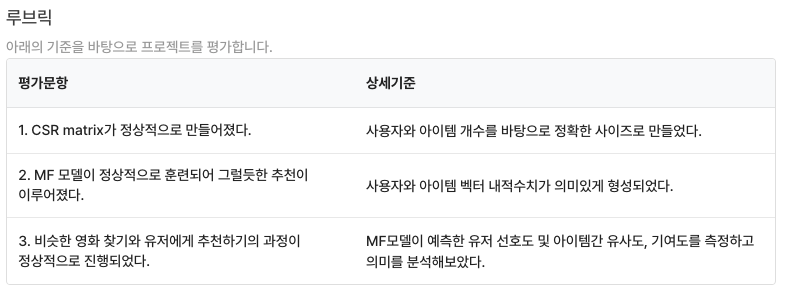

## 1) 데이터 준비와 전처리

In [4]:
import os
import pandas as pd
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [6]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [7]:
ratings['counts'].describe()

count    836478.000000
mean          3.958293
std           0.762280
min           3.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: counts, dtype: float64

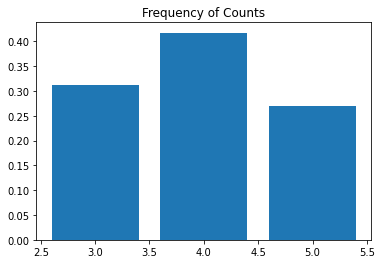

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

dd = ratings['counts'].value_counts(normalize=True)
plt.bar(x = dd.index, height = dd)
plt.title('Frequency of Counts')
plt.show()

In [9]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## 2) 분석해 봅시다.

In [10]:
#최대 장르 수
movies['genre'].apply(lambda x : len(x.split('|'))).max()

6

In [11]:
using_cols = ['user_id','movie_id','counts']
data = ratings[using_cols]

In [12]:
#유저 수, #영화 수, #레이팅 값
data[['user_id','movie_id']].nunique()

user_id     6039
movie_id    3628
dtype: int64

In [13]:
data.head(10)

,user_id,movie_id,counts
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
5,1,1197,3
6,1,1287,5
7,1,2804,5
8,1,594,4
9,1,919,4


In [14]:
# 시청이 제일 많고 평점도 좋은 영화
movies_idx = movies[['movie_id','title']].copy() #merge를 위한 df
movie_count = data['counts'].groupby(data['movie_id']).mean()
movie_count = pd.merge(movie_count, movies_idx, left_on = 'movie_id', right_on = 'movie_id', how='left')
movie_count.sort_values(by = 'counts',ascending=False).head(10)#movie count도 같이 포함이 필요할듯 싶다

,movie_id,counts,title
1616,1830,5.0,Follow the Bitch (1998)
3296,3607,5.0,One Little Indian (1973)
3481,3800,5.0,Criminal Lovers (Les Amants Criminels) (1999)
2993,3280,5.0,"Baby, The (1973)"
904,989,5.0,Schlafes Bruder (Brother of Sleep) (1995)
1235,1360,5.0,Identification of a Woman (Identificazione di ...
3341,3656,5.0,Lured (1947)
646,687,5.0,Country Life (1994)
3559,3881,5.0,Bittersweet Motel (2000)
729,787,5.0,"Gate of Heavenly Peace, The (1995)"


In [15]:
count_movie = data['movie_id'].value_counts().to_frame()
count_movie.rename(columns={'movie_id':'views'},inplace=True)
count_movie.index.name= 'movie_id'
count_movie.reset_index(inplace=True)

In [16]:
count_movie = pd.merge(movie_count, count_movie, left_on = 'movie_id', right_on = 'movie_id', how='left')

In [17]:
count_movie.loc[count_movie['views']  > 1000].sort_values(by = 'counts',ascending=False).head(30) #views를 추가해서 보니 더 정확한 리뷰가 될것 같습니다.

,movie_id,counts,title,views
785,858,4.598523,"Godfather, The (1972)",2167
305,318,4.596627,"Shawshank Redemption, The (1994)",2194
49,50,4.577982,"Usual Suspects, The (1995)",1744
509,527,4.571112,Schindler's List (1993),2257
698,750,4.539334,Dr. Strangelove or: How I Learned to Stop Worr...,1322
249,260,4.528522,Star Wars: Episode IV - A New Hope (1977),2910
1082,1198,4.520421,Raiders of the Lost Ark (1981),2473
823,904,4.505780,Rear Window (1954),1038
2600,2858,4.499844,American Beauty (1999),3211
842,923,4.493010,Citizen Kane (1941),1073


##  3) 내가 선호하는 영화를 6가지 골라서 ratings에 추가해 줍시다.

In [18]:
# 본인이 좋아하시는 아티스트 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = [2028,1196,2571,858,1,2273] #Saving Private..., Star Wars, Matrix, GodFather, Toy Story, Rushhour

In [19]:
# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['zimin']*6, 'movie_id': my_favorite, 'counts':[5]*6})
my_playlist

,user_id,movie_id,counts
0,zimin,2028,5
1,zimin,1196,5
2,zimin,2571,5
3,zimin,858,5
4,zimin,1,5
5,zimin,2273,5


In [20]:
if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    data = data.append(my_playlist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,movie_id,counts
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4
1000208,6040,1097,4
0,zimin,2028,5
1,zimin,1196,5
2,zimin,2571,5
3,zimin,858,5
4,zimin,1,5
5,zimin,2273,5


## 모델에 활용하기 위한 전처리 (실습)

In [21]:
data = pd.merge(data, movies, left_on = 'movie_id',right_on = 'movie_id', how='left')

In [22]:
len(data['movie_id'].unique())

3628

In [23]:
len(data['title'].unique()) # 중복된 타이틀이 있을 수 있어 위 unique 숫자와 일치

3628

In [24]:
data['title'] = data['title'].str.lower()

In [29]:
my_movies = list(data.loc[data['movie_id'].isin(my_favorite)].title.unique())
my_movies

['toy story (1995)',
 'saving private ryan (1998)',
 'star wars: episode v - the empire strikes back (1980)',
 'matrix, the (1999)',
 'godfather, the (1972)',
 'rush hour (1998)']

In [26]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
movie_unique = data['title'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

In [27]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['zimin'])    # 6040명의 유저 중 마지막으로 추가된 유저이니 6039이 나와야 합니다. 
print(movie_to_idx['toy story (1995)'])

6039
40


In [28]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()

In [30]:
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

user_id column indexing OK!!


In [31]:
# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_movie_data = data['title'].map(movie_to_idx.get).dropna()

In [33]:
if len(temp_movie_data) == len(data):
    print('movie column indexing OK!!')
    data['movie_id'] = temp_movie_data
else:
    print('movie column indexing Fail!!')

movie column indexing OK!!


## 4) CSR matrix를 직접 만들어 봅시다.

In [34]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_movie = data['title'].nunique()

csr_data = csr_matrix((data.counts, (data.user_id, data.movie_id)), shape= (num_user, num_movie))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836484 stored elements in Compressed Sparse Row format>

## 5) als_model = AlternatingLeastSquares 모델을 직접 구성하여 훈련시켜 봅시다.

## MF 모델 학습하기

In [35]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [36]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [37]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836484 stored elements in Compressed Sparse Column format>

In [38]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

In [40]:
zimin, toystory = user_to_idx['zimin'], movie_to_idx['toy story (1995)']
zimin_vector, toystory_vector = als_model.user_factors[zimin], als_model.item_factors[toystory]

print('슝=3')

슝=3


In [41]:
zimin_vector

array([-0.35185537,  0.2638715 ,  0.80937487,  1.3625817 ,  0.97349876,
        0.37830207, -0.69058204,  0.51541615,  0.380786  , -0.17892322,
        0.49850634,  0.27892017, -0.44185168,  0.29418045,  0.24059005,
        0.14989716,  0.26560044,  0.09613293,  0.9525859 ,  0.4891375 ,
        1.0687816 , -0.7504882 , -0.23376419,  0.8792075 ,  0.6905321 ,
       -0.2814354 , -0.18462452, -0.7516452 , -0.7879187 , -0.18411347,
        0.00522354, -0.05123312,  0.4280641 , -0.18801855, -0.32859057,
        0.8460953 ,  0.35392922, -0.21606238, -0.5053053 , -1.4210888 ,
       -0.13774349,  0.41685846, -0.6222218 , -0.30422163,  0.46270838,
        0.8860536 ,  0.9253033 ,  1.0103644 ,  0.164653  , -0.901983  ,
        0.05782325,  0.6344687 , -0.10520579, -0.6621283 , -0.42261073,
       -0.16787387, -0.91833293, -0.15202098, -0.23853214, -0.19878022,
        0.24581818, -1.0549282 , -0.09945901,  0.85683346, -0.16223249,
        1.0275521 , -0.18225631,  0.08877969,  0.02797884,  0.18

In [42]:
toystory_vector

array([-2.0335294e-02, -7.6098595e-04,  1.0005861e-02,  4.0627703e-02,
        1.8197191e-03,  4.1386001e-02,  1.7668040e-02,  1.8539786e-02,
        1.8772774e-03,  2.4145104e-02, -1.7375309e-02,  2.6770653e-02,
       -3.8254268e-02,  2.2376550e-02,  4.3346103e-02,  2.4847031e-02,
        1.4625705e-03,  1.2593099e-02,  7.1429303e-03,  3.2463742e-03,
        4.3329224e-02, -2.4820860e-02,  9.7615309e-03,  2.4837373e-02,
        1.5990335e-02, -1.7658286e-02,  2.5961101e-02, -2.1365076e-02,
       -1.2633979e-02, -1.9599376e-02,  2.0346304e-03, -1.6093535e-02,
        8.2146823e-03,  8.3645098e-03, -4.9912729e-03,  2.0786511e-02,
       -2.8075570e-02, -1.9702310e-02, -2.9936660e-02, -1.7782724e-02,
       -7.2373990e-03,  2.3313822e-02, -3.5681073e-03, -2.2619132e-02,
        1.3893259e-02,  1.5485797e-04, -1.0486797e-03,  4.1469045e-02,
        3.4151534e-03, -1.0987067e-04, -1.7524049e-02,  6.9435094e-03,
        1.9596171e-02,  3.9425450e-03,  1.4846396e-02,  9.1078319e-03,
      

In [43]:
# zimin과 toystory를 내적하는 코드
np.dot(zimin_vector,toystory_vector)

0.5040657

In [45]:
rushhour = movie_to_idx['rush hour (1998)']
rushhour_vector = als_model.item_factors[rushhour]
np.dot(zimin_vector, rushhour_vector)

0.21822794

In [47]:
my_movies[0]

'toy story (1995)'

In [48]:
favorite_movie = my_movies[0] #toystory
movie_id = movie_to_idx[favorite_movie]
similar_movie = als_model.similar_items(movie_id, N=10)
similar_movie

[(40, 1.0000001),
 (50, 0.7734428),
 (33, 0.62694424),
 (322, 0.6016085),
 (4, 0.5689832),
 (110, 0.5484212),
 (330, 0.5053634),
 (10, 0.4937363),
 (20, 0.48916164),
 (255, 0.4355795)]

In [50]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_movies = {v:k for k,v in movie_to_idx.items()}
[idx_to_movies[i[0]] for i in similar_movie]

['toy story (1995)',
 'toy story 2 (1999)',
 'aladdin (1992)',
 'babe (1995)',
 "bug's life, a (1998)",
 'groundhog day (1993)',
 'lion king, the (1994)',
 'beauty and the beast (1991)',
 'pleasantville (1998)',
 "there's something about mary (1998)"]

In [51]:
def get_similar_artist(movie_name: str):
    movie_id = movie_to_idx[movie_name]
    similar_movie = als_model.similar_items(movie_id)
    similar_movie = [idx_to_movies[i[0]] for i in similar_movie]
    return similar_movie

print("슝=3")

슝=3


In [52]:
get_similar_artist('aladdin (1992)')

['aladdin (1992)',
 'beauty and the beast (1991)',
 'lion king, the (1994)',
 'toy story (1995)',
 'little mermaid, the (1989)',
 'mulan (1998)',
 'hercules (1997)',
 'hunchback of notre dame, the (1996)',
 'tarzan (1999)',
 'anastasia (1997)']

In [53]:
get_similar_artist('groundhog day (1993)')

['groundhog day (1993)',
 'clueless (1995)',
 'forrest gump (1994)',
 'four weddings and a funeral (1994)',
 'toy story (1995)',
 'shakespeare in love (1998)',
 'pleasantville (1998)',
 "there's something about mary (1998)",
 'dave (1993)',
 'when harry met sally... (1989)']

## 8) 내가 가장 좋아할 만한 영화들을 추천받아 봅시다.

## 유저에게 아티스트 추천하기


In [54]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

[(44, 0.5929069),
 (380, 0.55499697),
 (120, 0.4679784),
 (64, 0.44548827),
 (23, 0.4114173),
 (50, 0.3717476),
 (92, 0.37048352),
 (141, 0.36321366),
 (87, 0.33561897),
 (26, 0.30228406),
 (200, 0.29775676),
 (322, 0.29568815),
 (157, 0.27022102),
 (60, 0.25923592),
 (193, 0.25440028),
 (7, 0.23988026),
 (450, 0.23666401),
 (121, 0.23251209),
 (22, 0.22279152),
 (375, 0.22203906)]

In [55]:
[idx_to_movies[i[0]] for i in movie_recommended]

['star wars: episode iv - a new hope (1977)',
 'godfather: part ii, the (1974)',
 'raiders of the lost ark (1981)',
 'star wars: episode vi - return of the jedi (1983)',
 "schindler's list (1993)",
 'toy story 2 (1999)',
 'terminator 2: judgment day (1991)',
 'fugitive, the (1993)',
 'braveheart (1995)',
 'e.t. the extra-terrestrial (1982)',
 'terminator, the (1984)',
 'babe (1995)',
 'shawshank redemption, the (1994)',
 'star wars: episode i - the phantom menace (1999)',
 'alien (1979)',
 'christmas story, a (1983)',
 'life is beautiful (la vita è bella) (1997)',
 'silence of the lambs, the (1991)',
 'back to the future (1985)',
 'face/off (1997)']

In [59]:
toy2 = movie_to_idx['toy story 2 (1999)']
explain = als_model.explain(user, csr_data, itemid=toy2)

In [60]:
[(idx_to_movies[i[0]], i[1]) for i in explain[1]]

[('toy story (1995)', 0.38507865876979236),
 ('saving private ryan (1998)', 0.03852828567646925),
 ('godfather, the (1972)', 0.019728390215098174),
 ('rush hour (1998)', -0.012683381300105207),
 ('star wars: episode v - the empire strikes back (1980)',
  -0.02543590988668331),
 ('matrix, the (1999)', -0.03969736962575806)]